In [1]:
import sys
sys.path.append("../model/clustering")

import cv2
import numpy as np

import matplotlib.pyplot as plt

from superpixel import toboggan, Superpixel

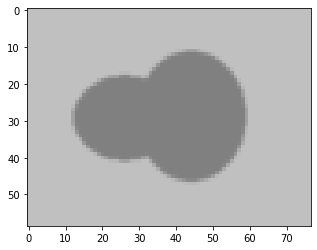

In [2]:
# Load sample image
imsample_gourd = cv2.imread("../asset/gourd.png").astype(np.uint8)

plt.imshow(imsample_gourd)

Text(0.5, 1.0, 'superpixel')

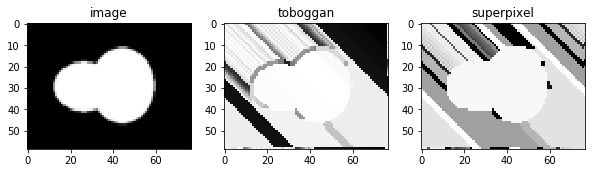

In [4]:
## Toboggan & Superpixel clustering

# Get input dimensions
image = imsample_gourd[..., 0]
height, width = image.shape

# Cluster image domain
fragment = toboggan(image)
fragment = 255*(fragment - fragment.min())/(fragment.max() - fragment.min())
    
# Define model
model = Superpixel(sigma=32)

# Run
region = model.run(image)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
axes[0].imshow(image, cmap="Greys")
axes[1].imshow(fragment, cmap="Greys")
axes[2].imshow(region, cmap="Greys")

axes[0].set_title("image")
axes[1].set_title("toboggan")
axes[2].set_title("superpixel")